# Vadeli İşlem Bonusu Çaprazlama

Bu çalışmada, kripto para borsalarının yeni kayıt olan kullanıcılara sunduğu vadeli işlem bonuslarını hedge işlemleriyle nasıl riske girmeden en etkili şekilde çekilebilir kâra dönüştürebileceğimizi analiz ediyoruz.

## Kurallar :

- Her KYC doğrulayan hesap için 50 USDT vadeli işlemler bonusu verilir.
- Bonus çekilemez; yalnızca işlemlerden elde edilen kâr çekilebilir.
- Bakiye çekildiğinde bonus hesaptan silinir.


## Strateji :

- Hesaplara tanımlanan vadeli işlem bonusunu hedge ederek riske girmeden bakiyenin bir kısmı çekilebilir.

- Bakiyeyi eşit miktarlara ayırıp yarısı ile LONG yarısı ile SHORT işlem açılır.

- Pozisyonu açarken zincirleme tetiklenmesi için birinin likide olduğu fiyata diğerinin kar alma noktası ayarlanır (Her iki pozisyon içinde) ayrıca pozisyon açarken olabilecek en yüksek kaldıraç seçilmelidir ki hızlıca çaprazlayabilelim.


                           50 USDT ==> 25 USDT LONG | 25 USDT SHORT  
                                    
- Pozisyonlardan biri likide olurken diğeri kar alma noktasına gelir ve pozisyonlar kapanır.


                                     WİN             LOSE
                               25x2 USDT LONG | 25x0 USDT SHORT  
                                   +25 USDT   |    -25 USDT
                                         25 USDT PNL
                                             
- Gerçek piyasalarda vadeli bonuslarda aynı parite üzerinde hedge işlem açmanıza engel koyulacaktır ancak bunları aşmanın basit yolları var.

- Artık işlem açabileceğimiz bir bonus kalmadı ancak bakiyenin yarısını çekilebilir hale getirdik. Bedava 25 USDT'nin tadını çıkarın.

Ancak eğer elinizde fazladan birkaç hesap daha var ise veya arkadaşlarınız ile organize olabiliyor iseniz vadeli işlemler bonusu çok daha verimli çaprazlanabilir .



# Birden Çok Hesap ile Vadeli İşlem Bonusu Çaprazlama

Her hesabı kendi içinde çaprazlamak yerine hesapları birbirleri ile çaprazlar iseniz hesap sayısı(n) arttıkça hesap başına çekilebilir bakiye artacaktır.

Bunun arkasında yatan sebep hesapların bakiyeleri büyüdükçe elde edilen karın büyümesi ancak hesap başına verilen vadeli işlem bonusunun sabit kalmasıdır.

Örneğin 4 farklı hesabı kendi arlarında çaprazlayalım ve sonuçları inceleyelim.

            WİN         WİN        LOSS        LOSS
           ACC 1   |   ACC 2   |   ACC 3   |   ACC 4  
          50 USDT     50 USDT     50 USDT     50 USDT
            LONG   |    LONG   |   SHORT   |   SHORT
          100 USDT    100 USDT     0 USDT      0 USDT

                         WİN        LOSS
                        ACC 1  |   ACC 2
                      100 USDT    100 USDT     
                        LONG   |   SHORT
                      200 USDT    0 USDT

              ACC 1 BALANCE=200 USDT BONUS=50 USDT
                   BALANCE - BONUS = 150 USDT
     PNL PER ACC = TOTAL PNL / ACC COUNT(n) = 150/4 = 37.5 USDT

Örnekte görüldüğü gibi 4 hesabı kendi aralarında çaprazladığımızda hesap başına düşen çekilebilir miktar %50 artış gösterdi.

Şimdi kaç hesap ile çaprazlarsak , hesap başına düşen çekilebilir bakiyekaç olur ona bakalım :

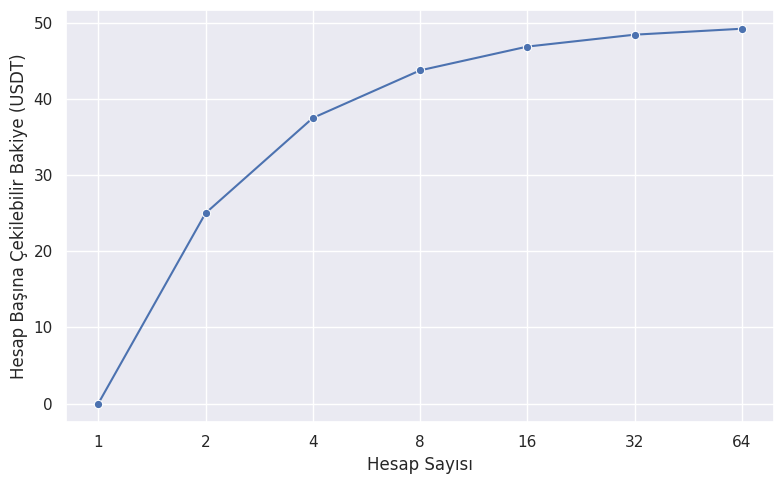

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

bonus_per_account = 50
account_counts = [1, 2, 4, 8, 16, 32, 64]

results = []
for n in account_counts:
    withdrawable = (n * bonus_per_account - bonus_per_account) / n
    results.append({
        'Hesap Sayısı': str(n),
        'Hesap Başına Ortalama (USDT)': withdrawable
    })

df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.lineplot(data=df, x='Hesap Sayısı', y='Hesap Başına Ortalama (USDT)', marker='o', sort=False)
plt.xlabel('Hesap Sayısı')
plt.ylabel('Hesap Başına Çekilebilir Bakiye (USDT)')
plt.tight_layout()
plt.show()
